In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


In [167]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)


In [181]:
def loaddocuments():
    rootdir = 'D:\\Data\\lsi\\bbc'
    documents = []
    r = ''
    
    df = pd.read_excel('./path_module2.xlsx')
    #df = df[(df['MODULENAME'] == 'BR_AAA') | (df['MODULENAME'] == 'NP_HAL') | (df['MODULENAME'] == 'RT_NSE') | \
    #    (df['MODULENAME'] =='RTADAPT_FWD_FRAME') | (df['MODULENAME'] =='NP_HAL') | (df['MODULENAME'] =='RT_NSE')]
    j  = 0
    target = np.zeros((df.count()['MODULENAME'],), dtype=np.int64)
    categories = df['MODULENAME'].unique().tolist()
    documents = []
    for index, row in df.iterrows():
        #data = ' '.join(row['FILENAME'].split('.')[0].split('_'))
        arr = row['FILEPATH'].split('.')[0].replace('\\', '_').split('_')
        arr = list(filter(lambda x: len(x)>0, arr))
        data = ' '.join(arr)

        documents.append(data)
        target[j] = categories.index(row['MODULENAME'])
        j = j + 1

    return sklearn.datasets.base.Bunch(data=documents, target=target, target_names=categories), categories

In [182]:
dataset, categories = loaddocuments()
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]
vectorizer = HashingVectorizer(n_features=1000,
                                       norm=None,
                                       binary=False)
X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)

14243 documents
100 categories

n_samples: 14243, n_features: 1000


In [183]:
svd = TruncatedSVD(15)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

Explained variance of the SVD step: 46%


In [184]:
X[0]


array([ 0.6167876 ,  0.2401697 ,  0.69064043, -0.19036198,  0.11754847,
       -0.07232524,  0.02630176, -0.03696505, -0.15351067, -0.03936873,
        0.03831172,  0.0016893 ,  0.02721416,  0.01240414,  0.0090758 ])

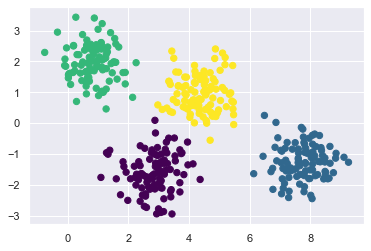

In [124]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [125]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

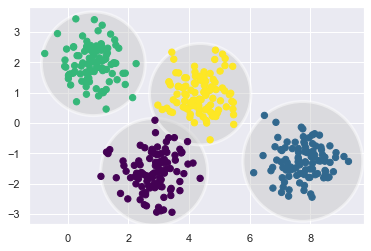

In [126]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

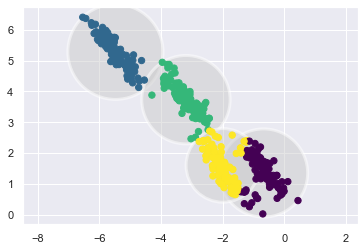

In [127]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [185]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=len(dataset.target_names)).fit(X)
newlabels = gmm.predict(X)


In [186]:
print(labels[1000:1100])

[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [187]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.993 0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.007 0.    0.    0.    0.    0.
  0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    

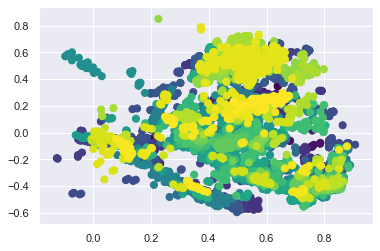

In [188]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [189]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


ValueError: too many values to unpack (expected 2)

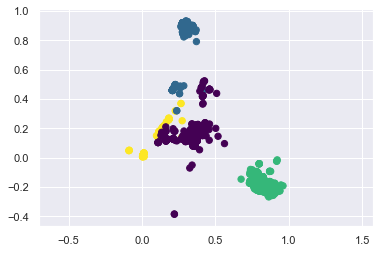

In [173]:
gmm = GMM(n_components=len(dataset.target_names), random_state=42)
plot_gmm(gmm, X)

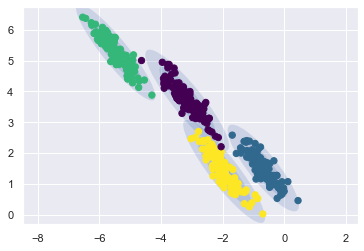

In [138]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

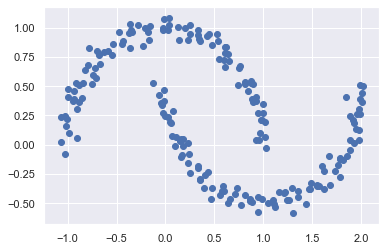

In [139]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

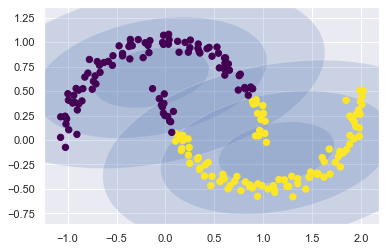

In [140]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

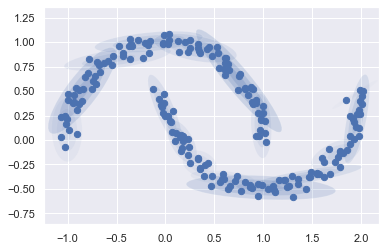

In [141]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

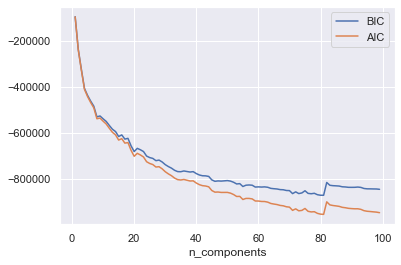

In [192]:
n_components = np.arange(1, 100)
models = [GMM(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [146]:
X

array([[ 6.48826703e+00,  2.50064460e-01],
       [ 2.52194722e+00, -2.69798647e+00],
       [ 3.06877291e+00, -2.90007604e+00],
       [ 4.31427482e+00,  7.02950576e-01],
       [ 2.38449945e+00, -2.53563494e+00],
       [ 7.80540956e+00, -1.70297829e+00],
       [ 8.38773426e-01,  2.22322228e+00],
       [ 4.17614316e+00,  7.93137001e-03],
       [ 3.02668532e+00, -1.79041773e+00],
       [ 1.26987864e+00,  1.76747403e+00],
       [ 7.81974467e+00, -9.49424332e-01],
       [ 1.87335276e-01,  2.51921931e+00],
       [ 3.43116792e+00,  2.33812285e+00],
       [ 3.39806103e+00, -2.39482483e+00],
       [ 2.95679593e+00, -7.91981675e-01],
       [ 1.13171965e+00,  3.22881491e+00],
       [ 1.59701749e+00, -1.80822253e+00],
       [ 4.09867867e-01,  1.62350489e+00],
       [ 3.89290127e+00,  1.21767506e+00],
       [ 3.54666555e+00, -1.22768985e+00],
       [ 3.53554556e+00, -1.06406044e+00],
       [ 2.66329169e+00, -2.07216196e+00],
       [ 7.15134224e+00, -1.95483315e+00],
       [ 4.